<a href="https://colab.research.google.com/github/sachincs3108/portfolioprojects/blob/main/OT7_Simulated_Annealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simulated annealing is a stochastic global search algorithm for function optimization.

The algorithm is inspired by annealing in metallurgy where metal is heated to a high temperature quickly, then cooled slowly, which increases its strength and makes it easier to work with.

The annealing process works by first exciting the atoms in the material at a high temperature, allowing the atoms to move around a lot, then decreasing their excitement slowly, allowing the atoms to fall into a new, more stable configuration.

The simulated annealing optimization algorithm can be thought of as a modified version of stochastic hill climbing.

Stochastic hill climbing maintains a single candidate solution and takes steps of a random but constrained size from the candidate in the search space. If the new point is better than the current point, then the current point is replaced with the new point. This process continues for a fixed number of iterations.

Simulated annealing executes the search in the same way. The main difference is that new points that are not as good as the current point (worse points) are accepted sometimes.

A worse point is accepted probabilistically where the likelihood of accepting a solution worse than the current solution is a function of the temperature of the search and how much worse the solution is than the current solution.

In [ ]:
# simulated annealing search of a one-dimensional objective function
from numpy import asarray
from numpy import exp
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed

First, we must define our objective function and the bounds on each input variable to the objective function. The objective function is just a Python function we will name objective(). The bounds will be a 2D array with one dimension for each input variable that defines the minimum and maximum for the variable.

For example, a one-dimensional objective function and bounds would be defined as follows:

In [ ]:
# objective function
def objective(x):
	return x[0]**2.0


We can implement this simulated annealing algorithm as a reusable function that takes the name of the objective function, the bounds of each input variable, the total iterations, step size, and initial temperature as arguments, and returns the best solution found and its evaluation.

In [ ]:
# simulated annealing algorithm
def simulated_annealing(objective, bounds, n_iterations, step_size, temp):
	# generate an initial point
	best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# evaluate the initial point
	best_eval = objective(best)
	# current working solution
	curr, curr_eval = best, best_eval
	# run the algorithm
	for i in range(n_iterations):
		# take a step
		candidate = curr + randn(len(bounds)) * step_size
		# evaluate candidate point
		candidate_eval = objective(candidate)
		# check for new best solution
		if candidate_eval < best_eval:
			# store new best point
			best, best_eval = candidate, candidate_eval
			# report progress
			print('>%d f(%s) = %.5f' % (i, best, best_eval))
		# difference between candidate and current point evaluation
		diff = candidate_eval - curr_eval
		# calculate temperature for current epoch
		t = temp / float(i + 1)
		# calculate metropolis acceptance criterion
		metropolis = exp(-diff / t)
		# check if we should keep the new point
		if diff < 0 or rand() < metropolis:
			# store the new current point
			curr, curr_eval = candidate, candidate_eval
	return [best, best_eval]
 


we will apply the simulated annealing optimization algorithm to an objective function.

First, let’s define our objective function.

We will use a simple one-dimensional x^2 objective function with the bounds [-5, 5].


Running the example creates a line plot of the objective function and clearly marks the function optima.

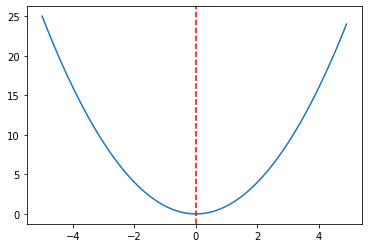

In [ ]:
# convex unimodal optimization function
from numpy import arange
from matplotlib import pyplot
 
# objective function
def objective(x):
	return x[0]**2.0
 
# define range for input
r_min, r_max = -5.0, 5.0
# sample input range uniformly at 0.1 increments
inputs = arange(r_min, r_max, 0.1)
# compute targets
results = [objective([x]) for x in inputs]
# create a line plot of input vs result
pyplot.plot(inputs, results)
# define optimal input value
x_optima = 0.0
# draw a vertical line at the optimal input
pyplot.axvline(x=x_optima, ls='--', color='red')
# show the plot
pyplot.show()

Before we apply the optimization algorithm to the problem, let’s take a moment to understand the acceptance criterion a little better.

First, the fast annealing schedule is an exponential function of the number of iterations. We can make this clear by creating a plot of the temperature for each algorithm iteration.

We will use an initial temperature of 10 and 100 algorithm iterations, both arbitrarily chosen.


Running the example calculates the temperature for each algorithm iteration and creates a plot of algorithm iteration (x-axis) vs. temperature (y-axis).

We can see that temperature drops rapidly, exponentially, not linearly, such that after 20 iterations it is below 1 and stays low for the remainder of the search.

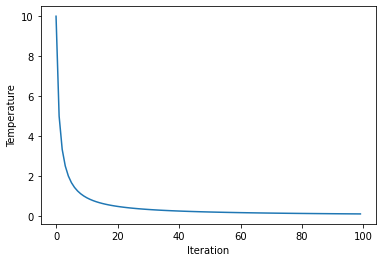

In [ ]:
# explore temperature vs algorithm iteration for simulated annealing
from matplotlib import pyplot
# total iterations of algorithm
iterations = 100
# initial temperature
initial_temp = 10
# array of iterations from 0 to iterations - 1
iterations = [i for i in range(iterations)]
# temperatures for each iterations
temperatures = [initial_temp/float(i + 1) for i in iterations]
# plot iterations vs temperatures
pyplot.plot(iterations, temperatures)
pyplot.xlabel('Iteration')
pyplot.ylabel('Temperature')
pyplot.show()

In [ ]:
# seed the pseudorandom number generator
seed(1)
# define range for input
bounds = asarray([[-5.0, 5.0]])
# define the total iterations
n_iterations = 1000
# define the maximum step size
step_size = 0.1
# initial temperature
temp = 10
# perform the simulated annealing search
best, score = simulated_annealing(objective, bounds, n_iterations, step_size, temp)
print('Done!')
print('f(%s) = %f' % (best, score))

>34 f([-0.78753544]) = 0.62021
>35 f([-0.76914239]) = 0.59158
>37 f([-0.68574854]) = 0.47025
>39 f([-0.64797564]) = 0.41987
>40 f([-0.58914623]) = 0.34709
>41 f([-0.55446029]) = 0.30743
>42 f([-0.41775702]) = 0.17452
>43 f([-0.35038542]) = 0.12277
>50 f([-0.15799045]) = 0.02496
>66 f([-0.11089772]) = 0.01230
>67 f([-0.09238208]) = 0.00853
>72 f([-0.09145261]) = 0.00836
>75 f([-0.05129162]) = 0.00263
>93 f([-0.02854417]) = 0.00081
>144 f([0.00864136]) = 0.00007
>149 f([0.00753953]) = 0.00006
>167 f([-0.00640394]) = 0.00004
>225 f([-0.00044965]) = 0.00000
>503 f([-0.00036261]) = 0.00000
>512 f([0.00013605]) = 0.00000
Done!
f([0.00013605]) = 0.000000


Running the example reports the progress of the search including the iteration number, the input to the function, and the response from the objective function each time an improvement was detected.

At the end of the search, the best solution is found and its evaluation is reported.

